### This notebook shows an example of how to visualize the distribution function and the fields. The example simulation is that of a two-stream instability

In [1]:
import xarray as xr, numpy as np, os
from matplotlib import pyplot as plt
import yaml
from jax import config
config.update("jax_enable_x64", True)
from adept import ergoExo

MLflow Version: 2.15.0
MLflow Tracking URI: file:///Users/archis/Dev/code/ergodic/adept-notebooks/vlasov/mlruns


In [2]:
with open("configs/two-stream.yaml", 'r') as stream:
    cfg = yaml.safe_load(stream)

exo = ergoExo()
modules = exo.setup(cfg=cfg)
sim_out, post_processed_output, mlflow_run_id = exo(modules)

2024/10/16 20:53:34 INFO mlflow.tracking.fluent: Experiment with name 'twostream' does not exist. Creating a new experiment.


2024/10/16 20:53:35 WARNING mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics because creating `GPUMonitor` failed with error: `pynvml` is not installed, to log GPU metrics please run `pip install pynvml` to install it..
2024/10/16 20:53:35 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.


Successfully removed /var/folders/tz/l3jmsqhd7tbfz3rjb276f_3r0000gn/T/tmp7mb6b99_


/Users/archis/Dev/code/ergodic/adept-notebooks/venv/lib/python3.12/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
2024/10/16 20:54:01 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2024/10/16 20:54:01 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!


Successfully removed /var/folders/tz/l3jmsqhd7tbfz3rjb276f_3r0000gn/T/tmpm528zu64


In [3]:
f = post_processed_output["dists"]

In [4]:
f.coords

Coordinates:
  * t        (t) float32 204B 0.0 2.0 4.0 6.0 8.0 ... 92.0 94.0 96.0 98.0 100.0
  * x        (x) float32 256B 0.1636 0.4908 0.818 1.145 ... 20.12 20.45 20.78
  * v        (v) float32 16kB -6.398 -6.395 -6.392 -6.389 ... 6.392 6.395 6.398

### And then you can plot using the built-in xarray plotters
### Or you can access the underlying Array and coordinates and use your own plotting methods

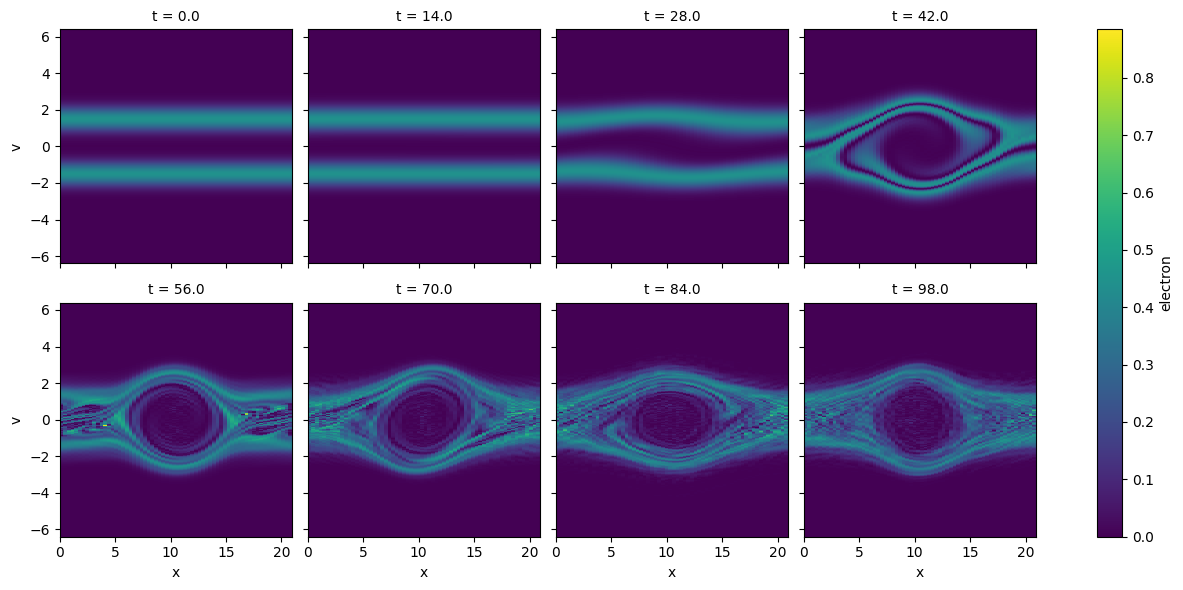

In [5]:
np.abs(f["electron"][::7, ]).T.plot(col="t", col_wrap=4)
plt.savefig("./tsi.png", bbox_inches="tight")

### Similarly, you can also plot the fields

In [7]:
flds = post_processed_output["fields"]

In [8]:
flds

<xarray.Dataset> Size: 144kB
Dimensions:        (t: 51, x: 64)
Coordinates:
  * t              (t) float32 204B 0.0 2.0 4.0 6.0 8.0 ... 94.0 96.0 98.0 100.0
  * x              (x) float32 256B 0.1636 0.4908 0.818 ... 20.12 20.45 20.78
Data variables:
    fields--flogf  (t, x) float32 13kB ...
    fields-a       (t, x) float32 13kB ...
    fields-de      (t, x) float32 13kB ...
    fields-e       (t, x) float32 13kB ...
    fields-f^2     (t, x) float32 13kB ...
    fields-n       (t, x) float32 13kB ...
    fields-p       (t, x) float32 13kB ...
    fields-pond    (t, x) float32 13kB ...
    fields-prev_a  (t, x) float32 13kB ...
    fields-q       (t, x) float32 13kB ...
    fields-v       (t, x) float32 13kB ...

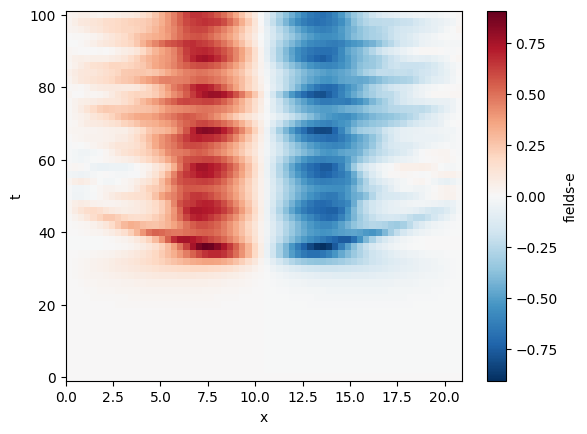

In [9]:
flds["fields-e"].plot()

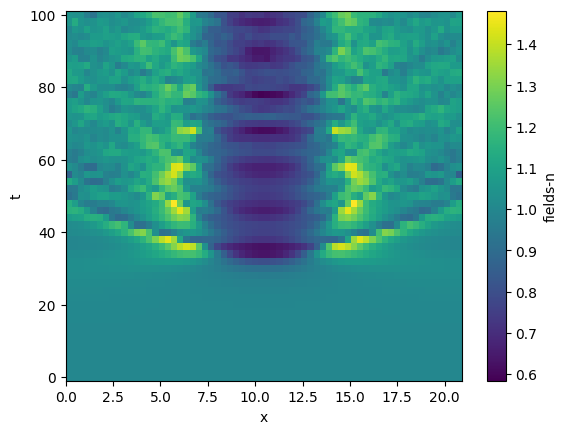

In [10]:
flds["fields-n"].plot()

### You can visualize the growth of the instability by plotting the total electrostatic energy over time

/Users/archis/Dev/code/ergodic/adept-notebooks/venv/lib/python3.12/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


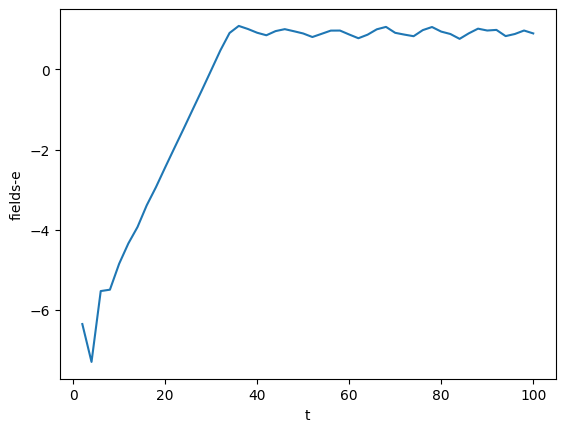

In [11]:
np.log10(np.sum(flds["fields-e"]**2., axis=1)).plot()